# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_performance(r, num_agents=40):
    rewards = []
    for i in range(num_agents):
        indices = np.where(r[:,0]==i)
        rews = r[indices][:,2]
        rewards.append(rews) 
        
    min_reward = []
    avg_reward = []
    max_reward = []
    min_len = min([len(rewards[i]) for i in range(num_agents)])
    for j in range(min_len):
        min_reward.append(min([rewards[i][j] for i in range(num_agents)]))
        avg_reward.append(sum([rewards[i][j] for i in range(num_agents)]) / num_agents)
        max_reward.append(max([rewards[i][j] for i in range(num_agents)]))    
        
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(min_reward)
    ax.plot(avg_reward)
    ax.plot(max_reward)
    ax.grid()
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)

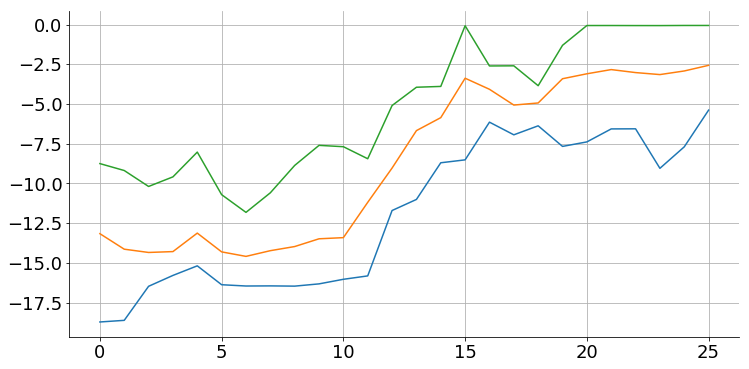

In [3]:
r = np.loadtxt('results/pendulum-hist_len3-frame_skip2-relu-batchnorm-agents40-prio_episode_rewards.txt')
plot_performance(r)

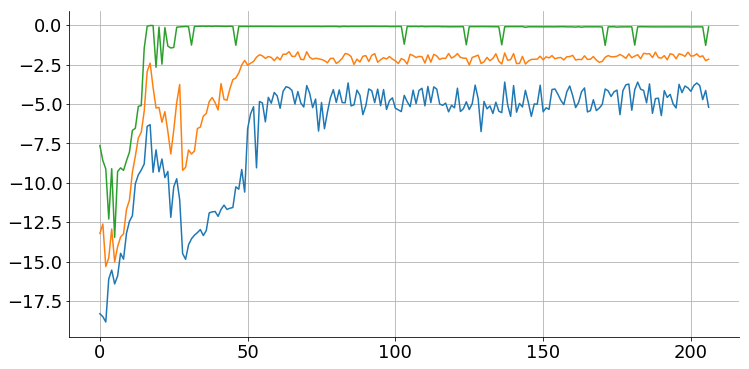

In [4]:
r = np.loadtxt('results/pendulum-hist_len3-frame_skip2-relu-batchnorm-agents40_episode_rewards.txt')
plot_performance(r)